# ASA CW2 Script

## 1. Data Pre-processing

In [45]:
import pandas as pd
import warnings


warnings.filterwarnings('ignore')

df_victim = pd.read_csv('./data/covid_victim.csv')
df_survivor = pd.read_csv('./data/covid_survivor.csv')

/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
print(df_victim['user_id'].nunique())
print(df_survivor['user_id'].nunique())

3047
4409


In [47]:
print(df_victim['tweet_id'].nunique())
print(df_survivor['tweet_id'].nunique())

3290
4726


As the ids are unique, there are lots of duplicate tweets. So the duplicated rows should be deleted.

In [48]:
df_victim[df_victim.duplicated()]

,tweet_id,user_id,user_name,user_screen_name,user_location,user_description,user_url,user_followers_count,user_friends_count,user_listed_count,...,user_verified,tweet_created_at,tweet_source,tweet_text,tweet_lang,tweet_favorite_count,tweet_retweet_count,hashtags,mentions,urls
101,1381828067354570753,812432327745880064,ADegrees,AngeliaDegrees,Sesame Street,I look better than Trump.,NaN,446,1252,1,...,False,Tue Apr 13 04:34:19 +0000 2021,"<a href=""http://twitter.com/download/android"" ...","RT @latimes: Los Angeles-based Pacific, whose ...",en,0,52,NaN,latimes,NaN
102,1381828041777717250,313037820,Christine Fitzgerald,CABird6,"Los Angeles, CA",Trying to be a good human & good GLOBAL citize...,NaN,3138,4993,172,...,False,Tue Apr 13 04:34:12 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @Variety: Arclight Cinemas and Pacific Thea...,en,0,126,NaN,Variety,NaN
103,1381827471843069952,96444967,Billy Bennight,billybennight,Los Angeles,I’m a ZUMA Press photographer & influencer. I'...,https://t.co/zA20vRjCjH,552,764,58,...,False,Tue Apr 13 04:31:57 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",RT @Variety: Arclight Cinemas and Pacific Thea...,en,0,126,NaN,Variety,NaN
104,1381826865720029185,52008367,Istyw,stywixi,LORPAS,Rain.. rain neo rain,NaN,448,1122,3,...,False,Tue Apr 13 04:29:32 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @tom_allard: East Timor independence hero X...,en,0,10,NaN,tom_allard,NaN
105,1381826692759515137,204223049,Mr Raccoon,BonjourMrRacoon,"Best Coast, CA",#Traveler (not right now though) | #dogenthusiast,NaN,1168,1637,14,...,False,Tue Apr 13 04:28:51 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",RT @Variety: Arclight Cinemas and Pacific Thea...,en,0,126,NaN,Variety,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58743,1379065700250173443,225638643,Rob 🇳🇱⛩🇪🇺🏯🇺🇳,Limburgensis,Planet Earth 🌏,#JapanStudies 🎌\r\nAlma mater @UniLeiden\r\nFo...,NaN,412,1588,10,...,False,Mon Apr 05 13:37:39 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Extraordinary story about an extraordinary pol...,en,0,0,NaN,NaN,https://t.co/T0xoVtQtKo
58744,1379064414901575685,788988364900958208,Nana Kwame Burner,kwame_burner,"Kumasi, Ghana",#Micburners,https://t.co/TnpoByc1Bk,510,132,0,...,False,Mon Apr 05 13:32:32 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",RT @yencomgh: Making this revelation at the la...,en,0,1,NaN,yencomgh,NaN
58745,1379064270273515533,14132290,Mark W Tebbutt,mwt2008,Chorley Lancashire UK,IT professional Lived in 0 carbon /air polluti...,https://t.co/OU0zwSzfHF,5809,5935,303,...,False,Mon Apr 05 13:31:58 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",RT @MyKomment: @mwt2008 Moreton and Saughall M...,en,0,1,NaN,MyKomment; mwt2008,NaN
58746,1379063312453939200,3395181400,YEN.com.gh | Ghana Trending News 🔥,yencomgh,"Accra, Ghana","Follow YEN for the latest news in politics, en...",https://t.co/rMH0uPsG41,91473,296,39,...,True,Mon Apr 05 13:28:10 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Making this revelation at the launch of the Ea...,en,3,1,yennews,NaN,https://t.co/MFtp7Uw6PW


In [49]:
# delete of duplicate rows
df_victim.drop_duplicates(keep='first',inplace=True)
df_survivor.drop_duplicates(keep='first',inplace=True)

In [50]:
print(df_victim.shape)
print(df_survivor.shape)

(3290, 23)
(4726, 23)


Drop (definite) useless columns firstly.

Missing features is one of concerned things.

In [51]:
print(df_victim.isnull().sum(axis=0))
print(df_survivor.isnull().sum(axis=0))

tweet_id                    0
user_id                     0
user_name                   0
user_screen_name            0
user_location             945
user_description          487
user_url                 2320
user_followers_count        0
user_friends_count          0
user_listed_count           0
user_favourites_count       0
user_statuses_count         0
user_created_at             0
user_verified               0
tweet_created_at            0
tweet_source                4
tweet_text                  0
tweet_lang                  0
tweet_favorite_count        0
tweet_retweet_count         0
hashtags                 2793
mentions                  627
urls                     2495
dtype: int64
tweet_id                    0
user_id                     0
user_name                   0
user_screen_name            0
user_location            1339
user_description          632
user_url                 3196
user_followers_count        0
user_friends_count          0
user_listed_count          

In [52]:
df_victim.drop(labels=['tweet_id', 'user_url', 'hashtags', 'urls'], axis=1, inplace=True)
df_survivor.drop(labels=['tweet_id', 'user_url', 'hashtags', 'urls'], axis=1, inplace=True)

In [53]:
### language check
print(df_victim[df_victim['tweet_lang'] == 'en'].shape)
print(df_survivor[df_survivor['tweet_lang'] == 'en'].shape)

(3289, 19)
(4725, 19)


Because only very few (1 for each) tweet is not english, delete them.

In [54]:
df_victim = df_victim[df_victim['tweet_lang'] == 'en']
df_survivor = df_survivor[df_survivor['tweet_lang'] == 'en']

Because the focus of the analysis is based on content of tweets, **tweet_text** is processed firstly.

In [55]:
# remove html tags using function got from lab session
import html_cleaner


df_victim['tweet_text'] = html_cleaner.remove_html(df_victim['tweet_text'])
df_survivor['tweet_text'] = html_cleaner.remove_html(df_survivor['tweet_text'])

Moreover, there are also some processings should be take:
1. convert each word to lower words
2. line feeds deletion
3. delete all links
4. delete user names
5. delete digits
6. delete punctuations
7. delete short words
8. delete stopwords
9. delete emojis
9. lemmatizing
10. stemming

We use NLTK to help handling lemmatizing and stemming.

In [12]:
import nltk

In [216]:
# failed to connect firstly
# solve this by adding an ip map of server in /etc/host
# 199.232.68.133  raw.githubusercontent.com

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Error loading stopwords: <urlopen error [Errno 60]
[nltk_data]     Operation timed out>
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/huntermao/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [58]:
from nltk.corpus import stopwords


stopwordslist = stopwords.words('english')

In [59]:
# define processing function
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
#from nltk.stem import PorterStemmer


stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()


def text_processing(text):
    # lower convertion
    text = str(text).lower()
    # stop words deletion & stemming and lemmatizing
    wl = []
    for t in text.split():
        if t not in stopwordslist:
            t = stemmer.stem(t)
            t = lemmatizer.lemmatize(t)
            wl.append(t)
    text = ' '.join(wl)
    # line feed deletion
    text = re.sub('\n', '', text)
    text = re.sub('\r', '', text)
    # link deletion
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # user deletion
    text = re.sub('rt @[^\s]+', '', text)
    text = re.sub('@[^\s]+', '', text)
    # digit deletion
    text = re.sub('\w*\d\w*', '', text)
    # punctuation deletion
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('—', '', text)    # special puctuations that are not included
    text = re.sub("‘|’", '', text)
    text = re.sub('“|”', '', text)
    text = re.sub('…', '', text)
    # short word deletion
    text = re.sub(' \w{1,2} ', ' ', text)
    text = re.sub('^\w{1,2} ', ' ', text)  # short words on start
    text = re.sub(' \w{1,2}$', ' ', text)  # short words in the end
    # emoji deletion
    # unicodes got from https://stackoverflow.com/a/58356570
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    # handling multiple spaces
    wl = []
    for t in text.split():
        wl.append(t)
    text = ' '.join(wl)
    return text

In [60]:
df_victim['tweet_text'] = df_victim['tweet_text'].apply(lambda x:text_processing(x))
df_survivor['tweet_text'] = df_survivor['tweet_text'].apply(lambda x:text_processing(x))

In [61]:
for i in df_victim['tweet_text']:
    print(i)

los angelesbas pacific whose locat includ popular arclight hollywood sunset boulevard latest victim
arclight cinema pacif theatr perman shut down victim coronavirus pandem brought moviego
arclight cinema pacif theatr perman shut down victim coronavirus pandem brought moviego
east timor independ hero xanana gusmao sad bizarr demis continues slap mourner tri retriev
arclight cinema pacif theatr perman shut down victim coronavirus pandem brought moviego
east timor independ hero xanana gusmao sad bizarr demis continues slap mourner tri retriev
arclight cinema pacif theatr perman shut down victim coronavirus pandem brought moviego
victim racism sexism homophobia xenophobia covid etc let electr slide neoliberalizat
exeast timor xanana gusmao slap mourners demand bodi covid victim
exeast timor xanana gusmao slap mourners demand bodi covid victim
arclight cinema pacif theatr perman shut down victim coronavirus pandem brought moviego
basically enough info roadblock get more offer victim skype t

extraordinarili brave family great report ⁦
extraordinarili brave family great report ⁦
extraordinarili brave family great report ⁦
extraordinarili brave family great report ⁦
extraordinarili brave family great report ⁦
extraordinarili brave family great report ⁦
extraordinarili brave family great report ⁦
extraordinarili brave family great report ⁦
extraordinarili brave family great report ⁦
extraordinarili brave family great report ⁦
bbc news covid blood clot victim sister urg peopl get astrazeneca vaccin
humbl watch
extraordinarili brave family great report ⁦
mani child spend time onlin due fbi remind parents caregivers teacher dange
incred selfless thing articul midst grief astl amaz role model covid blood clot victim sister urg peopl get astrazeneca vaccin bbc news
covid blood clot victim sister veri angri say everyon oxfordastrazeneca jab couldnt make
cult covid brainwash victim
covid blood clot victim sister urg peopl get astrazeneca vaccin bbc news
victim kate request skype int

## 2. Exploration

### 2.1 Analysis of Sentiment

Because the given datasets have no feature of given sentiment, it can not be analysed by machine learning. In this part we use ***vaderSentiment*** library to help analysing the sentiment of each tweets.

In [341]:
# if vaderSentiment if not downloaded run this
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 251 kB/s eta 0:00:01


In [62]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


analyzer = SentimentIntensityAnalyzer()
sentiment_scores_victim = df_victim['tweet_text'].apply(analyzer.polarity_scores).apply(lambda x: x['compound'])
sentiment_scores_survivor = df_survivor['tweet_text'].apply(analyzer.polarity_scores).apply(lambda x: x['compound'])

In [63]:
# classifier using recommended thresholds from VADER documentation on Github
def sentiment_classifier(score):
    if score >= 0.05:
        return 'Positive'
    elif score > -0.05:
        return 'Neutral'
    else:
        return 'Negative'

In [64]:
sentiment_victim = sentiment_scores_victim.apply(sentiment_classifier)
sentiment_survivor = sentiment_scores_survivor.apply(sentiment_classifier)

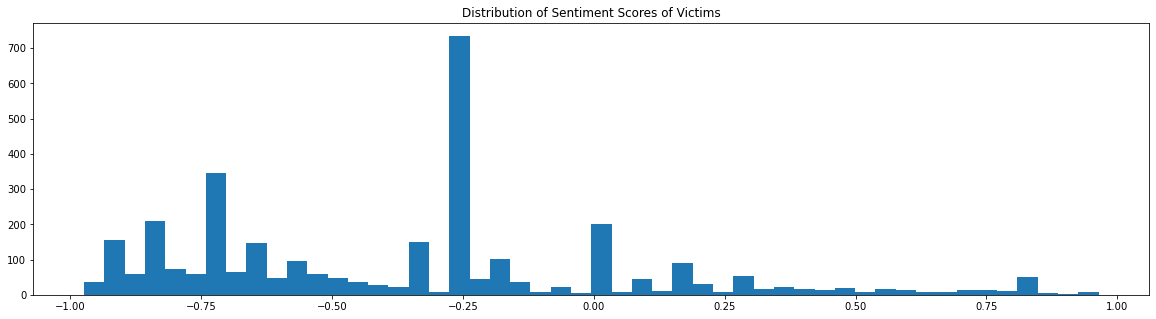

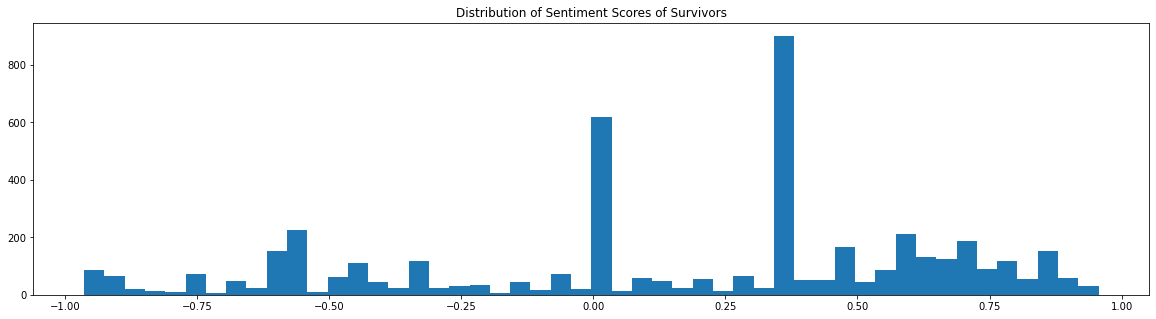

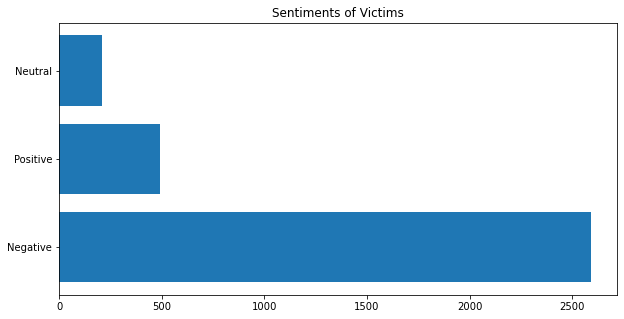

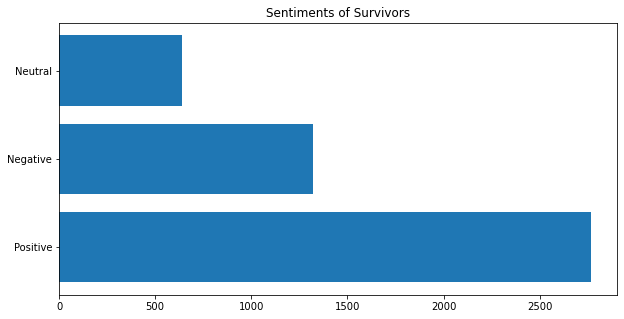

In [65]:
# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


plt.rcParams['figure.figsize'] = (20.0, 5.0)
plt.title('Distribution of Sentiment Scores of Victims')
plt.hist(sentiment_scores_victim, 50)
plt.show()

plt.rcParams['figure.figsize'] = (20.0, 5.0)
plt.title('Distribution of Sentiment Scores of Survivors')
plt.hist(sentiment_scores_survivor, 50)
plt.show()

plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.title('Sentiments of Victims')
plt.barh(sentiment_victim.value_counts().index, sentiment_victim.value_counts())
plt.show()

plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.title('Sentiments of Survivors')
plt.barh(sentiment_survivor.value_counts().index, sentiment_survivor.value_counts())
plt.show()

### 2.2 Key Descriptive Words

In this part we use ***wordcloud*** library to help visualise key words.

In [452]:
!pip install wordcloud

     |████████████████████████████████| 220 kB 168 kB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=158603 sha256=350dbef1740f50860f873d386e26b169047b9abd61c118616d3026d07373d7a3
  Stored in directory: /Users/huntermao/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud


Pre-processing from sentiments.

In [66]:
df_victim['sentiment'] = sentiment_victim
df_survivor['sentiment'] = sentiment_survivor

Define a plotting function

In [69]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image


def plot_wordcloud(df, collocations=False, title='title'):
    mask = np.array(Image.open('./twitter_mask.png'))
    
    wordcloud = WordCloud(background_color='white',
            max_words=100,
            max_font_size=100, 
            random_state=42,
            width=400, 
            height=200,
            mask=mask,
            collocations=collocations)
    text = ' '.join(df['tweet_text'])
    text = re.sub('covid|victim|survivor', '', text)
    wordcloud.generate(text)
    plt.figure(figsize=(12, 12))
    plt.title(title, size=25)
    plt.imshow(wordcloud)

#### Visualisation of Victims

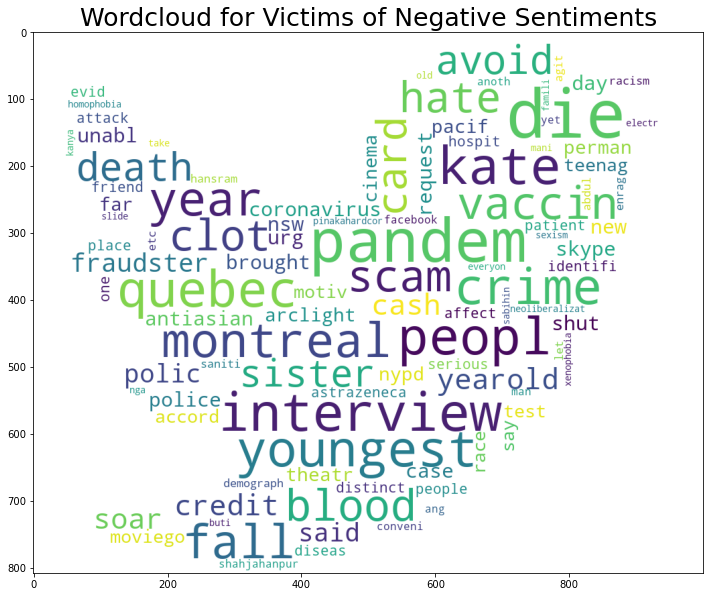

In [70]:
plot_wordcloud(df_victim[df_victim['sentiment'] == 'Negative'],
               collocations=False,
               title='Wordcloud for Victims of Negative Sentiments')

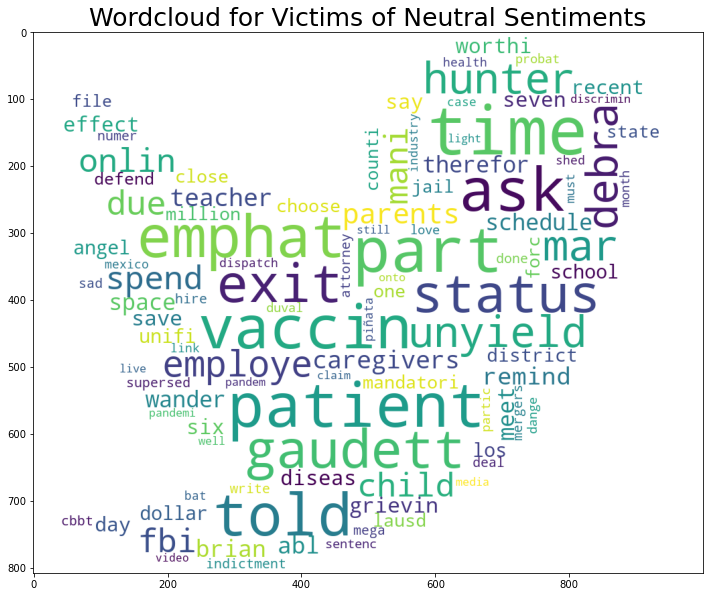

In [71]:
plot_wordcloud(df_victim[df_victim['sentiment'] == 'Neutral'],
               collocations=False,
               title='Wordcloud for Victims of Neutral Sentiments')

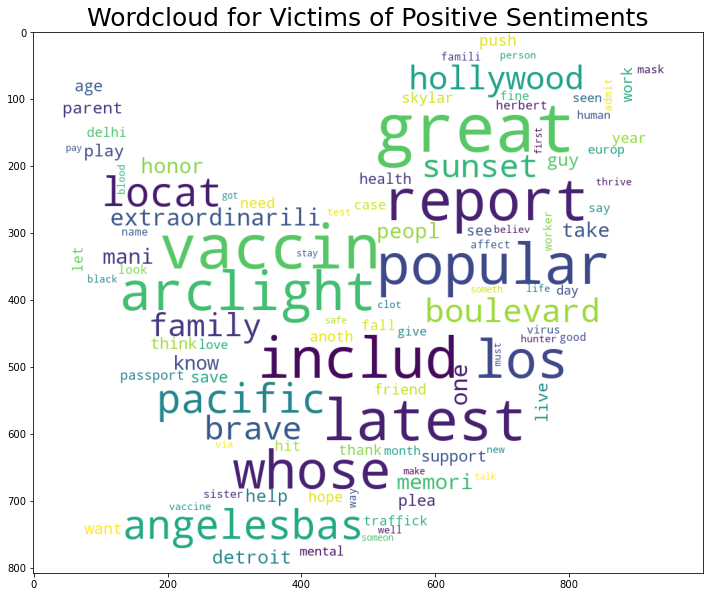

In [72]:
plot_wordcloud(df_victim[df_victim['sentiment'] == 'Positive'],
               collocations=False,
               title='Wordcloud for Victims of Positive Sentiments')

#### Visualisation of Survivors

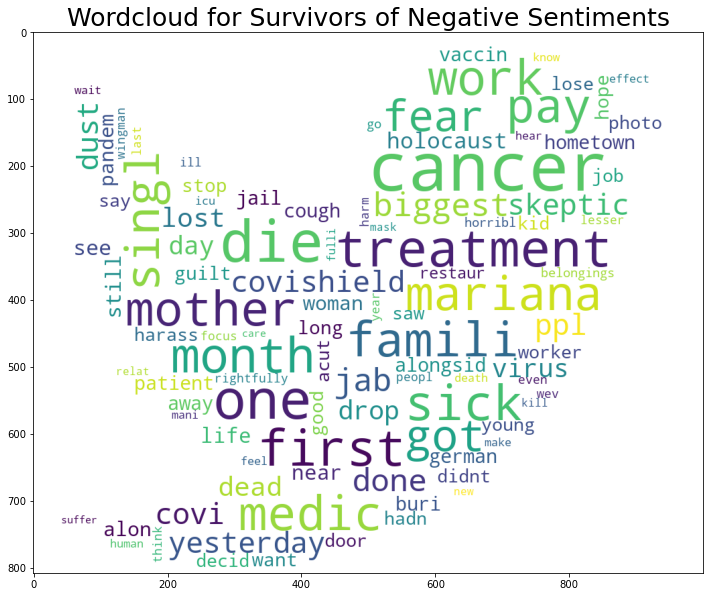

In [73]:
plot_wordcloud(df_survivor[df_survivor['sentiment'] == 'Negative'],
               collocations=False,
               title='Wordcloud for Survivors of Negative Sentiments')

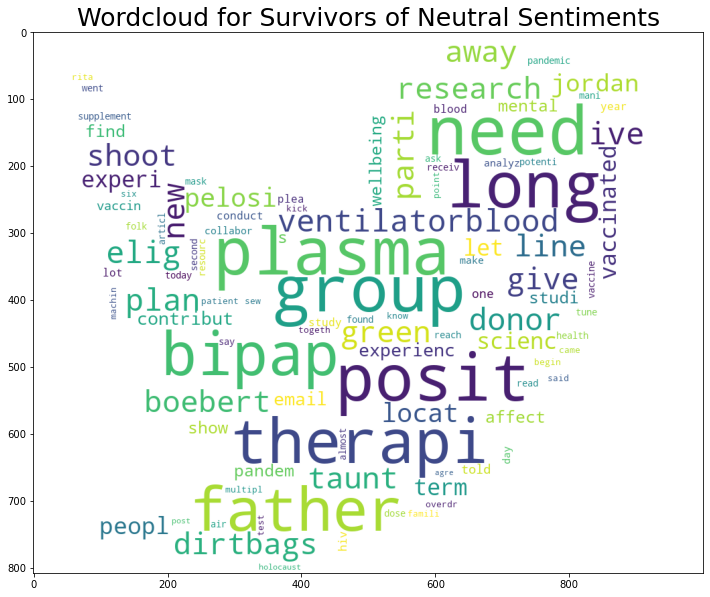

In [74]:
plot_wordcloud(df_survivor[df_survivor['sentiment'] == 'Neutral'],
               collocations=False,
               title='Wordcloud for Survivors of Neutral Sentiments')

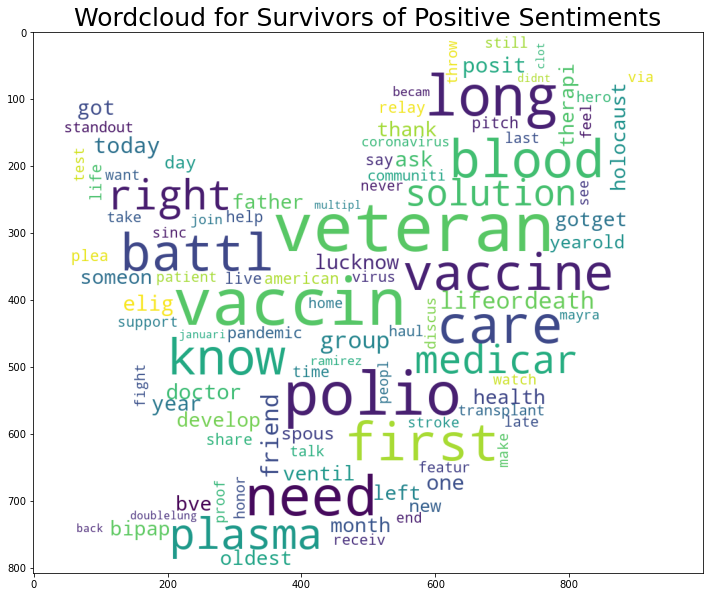

In [75]:
plot_wordcloud(df_survivor[df_survivor['sentiment'] == 'Positive'],
               collocations=False,
               title='Wordcloud for Survivors of Positive Sentiments')

### 2.3 Topic Modeling

This part is implemented using ***gensim*** and ***pyldavis*** libraries, which may need to be downloaded in advance.

In this seciton, we want to observe the topics in 5 dimensions, i.e. victims, survivors, negative tweets, neutral tweets, positive tweets.

In [528]:
!pip install gensim

In [547]:
!pip install pyLDAvis

/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Pre-processing...

In [93]:
list_victim = [text.split() for text in df_victim['tweet_text']]
list_survivor = [text.split() for text in df_survivor['tweet_text']]
list_negative = [text.split() for text in df_victim[df_victim['sentiment'] == 'Negative']['tweet_text']] + [text.split() for text in df_survivor[df_survivor['sentiment'] == 'Negative']['tweet_text']]
list_neutral = [text.split() for text in df_victim[df_victim['sentiment'] == 'Neutral']['tweet_text']] + [text.split() for text in df_survivor[df_survivor['sentiment'] == 'Neutral']['tweet_text']]
list_positive = [text.split() for text in df_victim[df_victim['sentiment'] == 'Positive']['tweet_text']] + [text.split() for text in df_survivor[df_survivor['sentiment'] == 'Positive']['tweet_text']]

Coherence score is used to evaluate number of topics

In [134]:
# https://neptune.ai/blog/pyldavis-topic-modelling-exploration-tool-that-every-nlp-data-scientist-should-know
import gensim


def compute_coherence_values(vocabs, corpus, texts, start=2, limit=30, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.ldamodel.LdaModel(corpus=corpus, id2word=vocabs, num_topics=num_topics, random_state=42)
        model_list.append(model)
        coherencemodel = models.CoherenceModel(model=model, texts=texts, dictionary=vocabs, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


def draw_coherence_values(vocabs, corpus, texts, start=2, limit=30, step=1):
    model_list, coherence_values = compute_coherence_values(vocabs=vocabs, corpus=corpus, texts=texts, start=start, limit=limit, step=step)
    
    limit = limit
    start = start
    step = step
    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.show()

#### Topic modeling of Victims

CPU times: user 66.3 ms, sys: 3.22 ms, total: 69.5 ms
Wall time: 69.1 ms
CPU times: user 34.8 ms, sys: 1.34 ms, total: 36.2 ms
Wall time: 36.3 ms


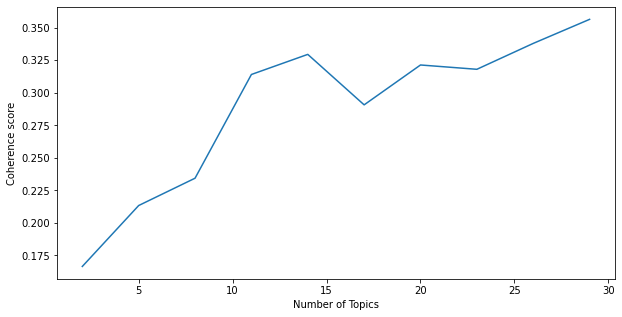

In [135]:
from gensim import corpora
from gensim import models


%time vocabs = corpora.Dictionary(list_victim) # generate vocabulary dictionary
%time corpus = [vocabs.doc2bow(list_doc) for list_doc in list_victim] # generate corpus for training model

draw_coherence_values(vocabs, corpus, list_victim, start, limit, step)

Choose n=11 as an elbow.

In [136]:
%time lda = models.ldamodel.LdaModel(corpus=corpus, id2word=vocabs, num_topics=14, random_state=42)

CPU times: user 1.38 s, sys: 9.54 ms, total: 1.39 s
Wall time: 1.4 s


In [137]:
# visualize the trained lda model using pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models


pyLDAvis.enable_notebook()

%time vis_data = pyLDAvis.gensim_models.prepare(lda, corpus, vocabs)

CPU times: user 619 ms, sys: 186 ms, total: 805 ms
Wall time: 3.02 s


In [139]:
vis_data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.104340 -0.099576       1        1  13.791282
4      0.065868 -0.059349       2        1  10.404737
2      0.053870  0.022084       3        1   9.171303
3      0.049685 -0.048868       4        1   9.104092
6     -0.050919 -0.010772       5        1   8.596820
7      0.074072 -0.109221       6        1   7.428375
11     0.030707 -0.029773       7        1   7.378387
5     -0.019470  0.013228       8        1   7.255903
0      0.007191  0.004053       9        1   5.821335
1     -0.347518 -0.108296      10        1   5.313367
13     0.083580 -0.050898      11        1   5.178035
9      0.014757  0.140434      12        1   4.107317
10    -0.029452  0.156820      13        1   3.430295
12    -0.036711  0.180134      14        1   3.018752, topic_info=           Term        Freq        Total Category  logprob  loglift
2172       kate  261.000000   261.000000  Default  30.0000  30.0000
1151  interview  273.000000   273.000000  Default  29.0000  29.0000
569       crime  306.000000   306.000000  Default  28.0000  28.0000
1675     quebec  317.000000   317.000000  Default  27.0000  27.0000
1677   youngest  325.000000   325.000000  Default  26.0000  26.0000
...         ...         ...          ...      ...      ...      ...
37        covid   13.892174  2279.966349  Topic14  -4.5466  -1.6003
80        death    8.200091   134.293370  Topic14  -5.0738   0.7044
215       great    7.565567    82.737498  Topic14  -5.1543   1.1083
206       first    6.703250    59.506588  Topic14  -5.2754   1.3168
222         die    6.956400   575.493583  Topic14  -5.2383  -0.9152

[834 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1870      2  0.123726     abuse
1870      6  0.618632     abuse
1870      7  0.123726     abuse
1864      1  0.098219  accident
1864      3  0.098219  accident
...     ...       ...       ...
1270     10  0.031157         ⁦
1270     11  0.062314         ⁦
1270     12  0.031157         ⁦
1270     13  0.124627         ⁦
1270     14  0.218097         ⁦

[2467 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 5, 3, 4, 7, 8, 12, 6, 1, 2, 14, 10, 11, 13])

#### Topic Modeling of Survivors

CPU times: user 86.7 ms, sys: 3.55 ms, total: 90.3 ms
Wall time: 90.1 ms
CPU times: user 43.1 ms, sys: 1.93 ms, total: 45 ms
Wall time: 45.1 ms


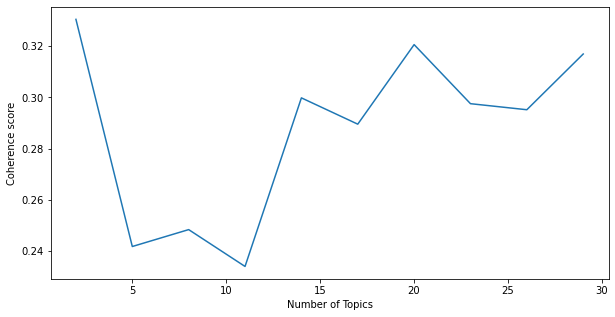

In [140]:
%time vocabs = corpora.Dictionary(list_survivor) # generate vocabulary dictionary
%time corpus = [vocabs.doc2bow(list_doc) for list_doc in list_survivor] # generate corpus for training model

draw_coherence_values(vocabs, corpus, list_survivor, start, limit, step)

Choose n = 14

In [143]:
%time lda = models.ldamodel.LdaModel(corpus=corpus, id2word=vocabs, num_topics=14, random_state=42)

pyLDAvis.enable_notebook()

%time vis_data = pyLDAvis.gensim_models.prepare(lda, corpus, vocabs)

vis_data

CPU times: user 1.3 s, sys: 8.92 ms, total: 1.31 s
Wall time: 1.32 s
CPU times: user 734 ms, sys: 12.8 ms, total: 747 ms
Wall time: 1.01 s


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13    -0.078192 -0.019195       1        1  12.674971
2      0.243915 -0.113038       2        1   9.755643
6     -0.040955  0.021834       3        1   9.075817
0     -0.027715  0.069790       4        1   8.881590
1     -0.177726 -0.301872       5        1   8.382907
10     0.079163 -0.008689       6        1   7.829075
5     -0.134558  0.104504       7        1   7.320039
4     -0.072999  0.104898       8        1   7.080509
12     0.024376  0.044666       9        1   6.882079
3      0.006736  0.079338      10        1   6.461804
7      0.021456 -0.017660      11        1   4.255742
11     0.101959  0.005595      12        1   4.177797
8      0.105524 -0.016858      13        1   3.897622
9     -0.050983  0.046686      14        1   3.324405, topic_info=             Term        Freq       Total Category  logprob  loglift
1106     solution  415.000000  415.000000  Default  30.0000  30.0000
1104      medicar  391.000000  391.000000  Default  29.0000  29.0000
957         there  427.000000  427.000000  Default  28.0000  28.0000
1102  lifeordeath  387.000000  387.000000  Default  27.0000  27.0000
1101        battl  419.000000  419.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
225         heart   11.162824   49.383906  Topic14  -5.1701   1.9168
128           one   13.924613  542.873822  Topic14  -4.9490  -0.2593
18         cancer   13.608211  514.814048  Topic14  -4.9720  -0.2293
244           got   11.549785  355.638261  Topic14  -5.1360  -0.0234
101          year   11.076435  165.179034  Topic14  -5.1779   0.7017

[841 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1745      1  0.062411   about
1745      6  0.748930   about
1745      8  0.124822   about
2212      4  0.923274  abroad
2212     14  0.034195  abroad
...     ...       ...     ...
303       1  0.023395       ⁦
303       4  0.023395       ⁦
303      10  0.795427       ⁦
303      12  0.093580       ⁦
303      13  0.046790       ⁦

[2769 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 3, 7, 1, 2, 11, 6, 5, 13, 4, 8, 12, 9, 10])

#### Topic Modeling of Positive Tweets

CPU times: user 63 ms, sys: 3.17 ms, total: 66.2 ms
Wall time: 65.5 ms
CPU times: user 32.1 ms, sys: 704 µs, total: 32.8 ms
Wall time: 32.9 ms


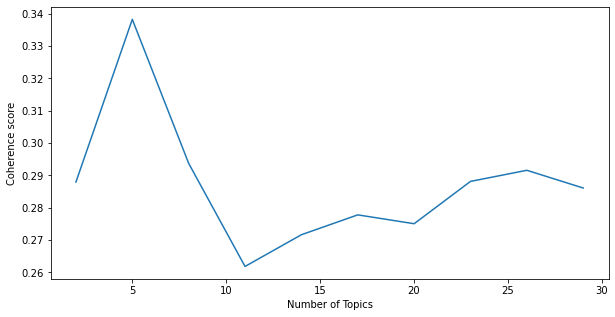

In [144]:
%time vocabs = corpora.Dictionary(list_positive) # generate vocabulary dictionary
%time corpus = [vocabs.doc2bow(list_doc) for list_doc in list_positive] # generate corpus for training model

draw_coherence_values(vocabs, corpus, list_positive, start, limit, step)

Choose n=5

In [145]:
%time lda = models.ldamodel.LdaModel(corpus=corpus, id2word=vocabs, num_topics=5, random_state=42)

pyLDAvis.enable_notebook()

%time vis_data = pyLDAvis.gensim_models.prepare(lda, corpus, vocabs)

vis_data

CPU times: user 1.33 s, sys: 8.32 ms, total: 1.34 s
Wall time: 1.35 s
CPU times: user 481 ms, sys: 8.37 ms, total: 489 ms
Wall time: 608 ms


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.039306 -0.012633       1        1  26.607152
0      0.052957  0.041517       2        1  20.237415
4     -0.221276  0.012031       3        1  18.852796
2      0.052784 -0.173989       4        1  18.445432
3      0.076228  0.133074       5        1  15.857205, topic_info=             Term        Freq       Total Category  logprob  loglift
1248      veteran  365.000000  365.000000  Default  30.0000  30.0000
1095        polio  245.000000  245.000000  Default  29.0000  29.0000
2540     solution  211.000000  211.000000  Default  28.0000  28.0000
2537  lifeordeath  211.000000  211.000000  Default  27.0000  27.0000
1761      medicar  214.000000  214.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
42            got   30.587159  161.137145   Topic5  -5.3737   0.1799
75          peopl   24.055983   88.940417   Topic5  -5.6139   0.5340
215          plea   23.265606   87.835598   Topic5  -5.6473   0.5131
5          latest   22.425239   59.790102   Topic5  -5.6841   0.8609
1165        watch   22.320241   73.165635   Topic5  -5.6888   0.6543

[313 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2012      1  0.851456    altern
2012      3  0.035477    altern
2012      4  0.070955    altern
664       1  0.378883  american
664       2  0.615685  american
...     ...       ...       ...
1316      5  0.033708     young
2341      4  0.775696      zinc
3086      5  0.809337  zinyemba
2632      5  0.936144    águeda
2633      5  0.936158         ⃣

[739 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 5, 3, 4])

#### Topic Modeling of Neutral Tweets

CPU times: user 13.8 ms, sys: 1.19 ms, total: 15 ms
Wall time: 14 ms
CPU times: user 9.48 ms, sys: 328 µs, total: 9.81 ms
Wall time: 10.1 ms


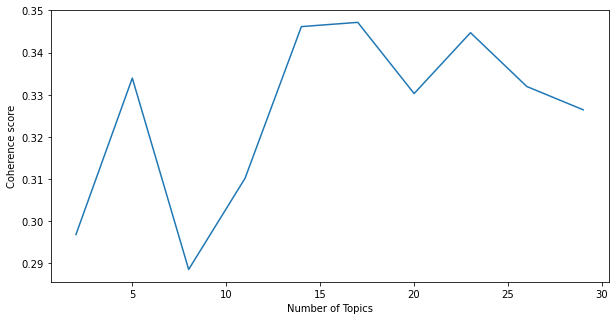

In [146]:
%time vocabs = corpora.Dictionary(list_neutral) # generate vocabulary dictionary
%time corpus = [vocabs.doc2bow(list_doc) for list_doc in list_neutral] # generate corpus for training model

draw_coherence_values(vocabs, corpus, list_neutral, start, limit, step)

Choose n=5

In [147]:
%time lda = models.ldamodel.LdaModel(corpus=corpus, id2word=vocabs, num_topics=5, random_state=42)

pyLDAvis.enable_notebook()

%time vis_data = pyLDAvis.gensim_models.prepare(lda, corpus, vocabs)

vis_data

CPU times: user 706 ms, sys: 5.84 ms, total: 711 ms
Wall time: 715 ms
CPU times: user 123 ms, sys: 5.21 ms, total: 128 ms
Wall time: 248 ms


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.208087  0.194687       1        1  33.250282
1     -0.279088  0.117751       2        1  21.296572
3      0.102928 -0.122890       3        1  19.023537
0      0.001928 -0.039609       4        1  14.548683
4     -0.033855 -0.149940       5        1  11.880927, topic_info=        Term       Freq      Total Category  logprob  loglift
681    locat  88.000000  88.000000  Default  30.0000  30.0000
680   jordan  88.000000  88.000000  Default  29.0000  29.0000
683   pelosi  88.000000  88.000000  Default  28.0000  28.0000
685    taunt  88.000000  88.000000  Default  27.0000  27.0000
684    shoot  88.000000  88.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
21   patient  11.525260  29.427644   Topic5  -4.6172   1.1928
14       ask  11.901584  33.284650   Topic5  -4.5851   1.1018
551      say  10.681777  25.818124   Topic5  -4.6932   1.2477
23      told  11.594629  51.214204   Topic5  -4.6112   0.6448
212   vaccin  10.861626  52.766067   Topic5  -4.6765   0.5496

[271 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
508       1  0.254440      about
508       5  0.636099      about
874       3  0.853003     abroad
1144      5  0.751877  activists
184       3  0.801229      admit
...     ...       ...        ...
175       3  0.035011       year
175       4  0.455145       year
175       5  0.245078       year
362       1  0.678992          ⁦
362       4  0.318277          ⁦

[470 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 1, 5])

#### Topic Modeling of Negative Tweets

CPU times: user 66.7 ms, sys: 2.01 ms, total: 68.7 ms
Wall time: 67.8 ms
CPU times: user 36.9 ms, sys: 1.4 ms, total: 38.3 ms
Wall time: 38.9 ms


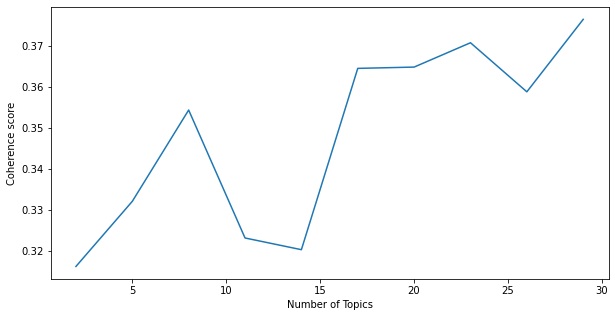

In [148]:
%time vocabs = corpora.Dictionary(list_negative) # generate vocabulary dictionary
%time corpus = [vocabs.doc2bow(list_doc) for list_doc in list_negative] # generate corpus for training model

draw_coherence_values(vocabs, corpus, list_negative, start, limit, step)

In [149]:
%time lda = models.ldamodel.LdaModel(corpus=corpus, id2word=vocabs, num_topics=8, random_state=42)

pyLDAvis.enable_notebook()

%time vis_data = pyLDAvis.gensim_models.prepare(lda, corpus, vocabs)

vis_data

CPU times: user 1.57 s, sys: 3.99 ms, total: 1.57 s
Wall time: 1.57 s
CPU times: user 526 ms, sys: 47.4 ms, total: 574 ms
Wall time: 730 ms


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.031079 -0.014670       1        1  21.232219
5     -0.118153 -0.017963       2        1  15.113110
2     -0.084056 -0.021424       3        1  13.273140
6     -0.084786 -0.185182       4        1  12.389023
7     -0.061045  0.193449       5        1  10.892482
0      0.049483  0.098340       6        1  10.689967
1      0.093581  0.005141       7        1   8.236996
3      0.236054 -0.057691       8        1   8.173063, topic_info=           Term        Freq        Total Category  logprob  loglift
2972   survivor  974.000000   974.000000  Default  30.0000  30.0000
1619  treatment  299.000000   299.000000  Default  29.0000  29.0000
1237     cancer  610.000000   610.000000  Default  28.0000  28.0000
443       crime  375.000000   375.000000  Default  27.0000  27.0000
737        sick  279.000000   279.000000  Default  26.0000  26.0000
...         ...         ...          ...      ...      ...      ...
11       victim   48.113551  1684.874919   Topic8  -4.4629  -1.0516
7        pandem   26.626244   331.720460   Topic8  -5.0546  -0.0181
600        harm   20.528257    69.034217   Topic8  -5.3147   1.2915
222     patient   21.304810   134.652349   Topic8  -5.2775   0.6606
198       peopl   21.974197   231.911353   Topic8  -5.2466   0.1478

[491 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2617      4  0.903814      abil
122       4  0.059769     about
122       5  0.836765     about
122       6  0.059769     about
2066      2  0.946158    abroad
...     ...       ...       ...
1327      3  0.137945  youngest
1327      4  0.019706  youngest
1327      5  0.755411  youngest
1327      6  0.013138  youngest
2214      7  0.949948      your

[1301 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 3, 7, 8, 1, 2, 4])

### 2.4 Temporal Natures

In this part, the focus is on **tweet_created_at** values, which represents the creation time of tweets. So this column should be handled.

In [171]:
df_victim['tweet_created_at'].str.split()

0        [Tue, Apr, 13, 04:34:19, +0000, 2021]
1        [Tue, Apr, 13, 04:34:12, +0000, 2021]
2        [Tue, Apr, 13, 04:31:57, +0000, 2021]
3        [Tue, Apr, 13, 04:29:32, +0000, 2021]
4        [Tue, Apr, 13, 04:28:51, +0000, 2021]
                         ...                  
58760    [Mon, Apr, 05, 12:18:06, +0000, 2021]
58761    [Mon, Apr, 05, 12:04:10, +0000, 2021]
58762    [Mon, Apr, 05, 12:00:16, +0000, 2021]
58763    [Mon, Apr, 05, 11:54:19, +0000, 2021]
58764    [Mon, Apr, 05, 11:50:52, +0000, 2021]
Name: tweet_created_at, Length: 3289, dtype: object

In [173]:
for i in df_victim['tweet_created_at'].str.split():
    if i[4] != '+0000':
        print(i[4])
    if i[1] != 'Apr':
        print(i[1])
    if i[5] != '2021':
        print(i[5])

In [174]:
for i in df_survivor['tweet_created_at'].str.split():
    if i[4] != '+0000':
        print(i[4])
    if i[1] != 'Apr':
        print(i[1])
    if i[5] != '2021':
        print(i[5])

Fortunately the time is unified to same time zone and all time is in April 2021, so it can be handled directly.

In [182]:
df_victim['tweet_created_at'] = df_victim['tweet_created_at'].str.split().apply(lambda x: '2021-04-' + x[2] + ' ' + x[3])
df_survivor['tweet_created_at'] = df_survivor['tweet_created_at'].str.split().apply(lambda x: '2021-04-' + x[2] + ' ' + x[3])

In [186]:
df_victim['tweet_created_at'] = pd.to_datetime(df_victim['tweet_created_at'])
df_survivor['tweet_created_at'] = pd.to_datetime(df_survivor['tweet_created_at'])

#### Sentiments overall

In [207]:
df_all = pd.concat([df_victim[['tweet_created_at', 'sentiment']], df_survivor[['tweet_created_at', 'sentiment']]])

In [210]:
df_all['tweet_created_at'] = df_all['tweet_created_at'].apply(lambda x: x.day)

<AxesSubplot:title={'center':'Sentiments overall over time'}, xlabel='tweet_created_at'>

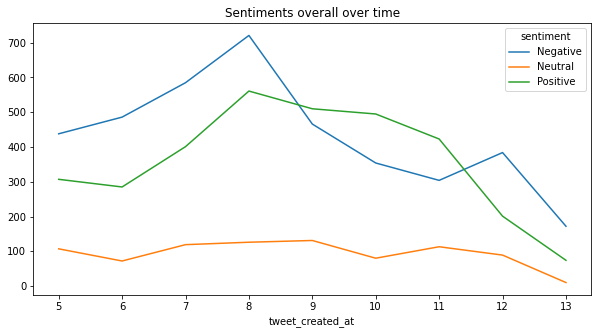

In [271]:
pd.crosstab(df_all['tweet_created_at'], df_all['sentiment']).plot(title='Sentiments overall over time')

#### Sentiments of Victims

<AxesSubplot:title={'center':'Sentiments of Victims over time'}, xlabel='tweet_created_at'>

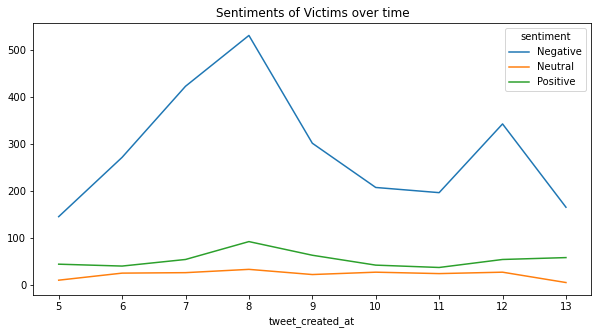

In [274]:
pd.crosstab(df_victim['tweet_created_at'].apply(lambda x: x.day), df_victim['sentiment']).plot(title='Sentiments of Victims over time')

#### Sentiment of Survivors

<AxesSubplot:title={'center':'Sentiments of Survivors over time'}, xlabel='tweet_created_at'>

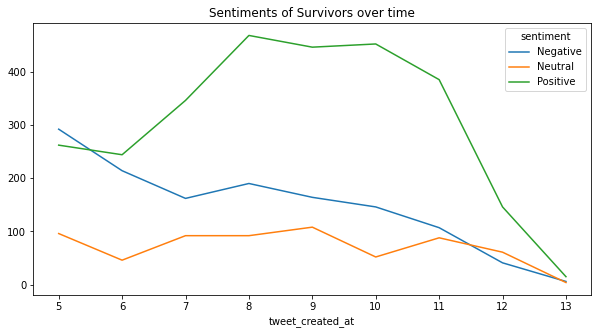

In [275]:
pd.crosstab(df_survivor['tweet_created_at'].apply(lambda x: x.day), df_survivor['sentiment']).plot(title='Sentiments of Survivors over time')

#### Engagement for all users

<AxesSubplot:title={'center':'Number of Tweets over time'}, xlabel='tweet_created_at'>

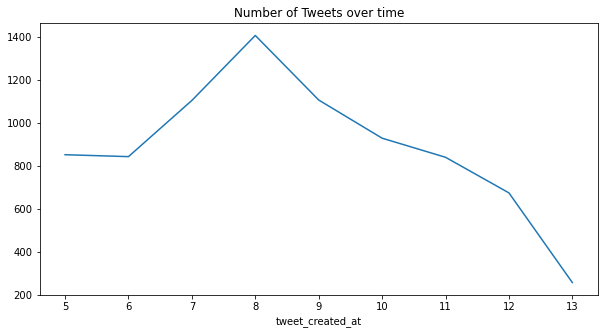

In [273]:
df_all.groupby('tweet_created_at').size().plot(title='Number of Tweets over time')

### 2.5 Social Net Analysis w/ Prevalence of Mentions

In this part we use networkx library to help visualise the social net analysis.

pre-processing

In [289]:
df_survivor['mentions'] = df_survivor['mentions'].apply(lambda x: re.sub(';', '', x).split())
df_victim['mentions'] = df_victim['mentions'].apply(lambda x: re.sub(';', '', x).split())

In [303]:
df_networks = pd.concat([df_victim[['user_screen_name', 'mentions']], df_survivor[['user_screen_name', 'mentions']]])
df_networks.reset_index(inplace=True)

In [306]:
df_networks.drop('index', 1, inplace=True)
df_networks

,user_screen_name,mentions
0,AngeliaDegrees,[latimes]
1,CABird6,[Variety]
2,billybennight,[Variety]
3,stywixi,[tom_allard]
4,BonjourMrRacoon,[Variety]
...,...,...
8009,laurenmill3r93,[dianaberrent]
8010,SamYouPhD,[dianaberrent]
8011,VirusesImmunity,[dianaberrent]
8012,jrho_jrho,[dianaberrent]


In [325]:
df_networks.dropna(inplace=True)

In [292]:
!pip install networkx

In [356]:
import networkx as nx


G = nx.Graph()
for index, tweet in df_networks.iterrows():
    for m in tweet[1]:
        G.add_edge(tweet[0], m)

In [363]:
largest_subgraph = max((G.subgraph(c).copy() for c in nx.connected_components(G)), key=len)

In [378]:
# reference: https://github.com/ugis22/analysing_twitter/blob/master/Jupyter%20Notebook%20files/Interaction%20Network.ipynb
from operator import itemgetter


graph_centrality = nx.degree_centrality(largest_subgraph)
max_de = max(graph_centrality.items(), key=itemgetter(1))

graph_closeness = nx.closeness_centrality(largest_subgraph)
max_clo = max(graph_closeness.items(), key=itemgetter(1))

graph_betweenness = nx.betweenness_centrality(largest_subgraph, normalized=True, endpoints=False)
max_bet = max(graph_betweenness.items(), key=itemgetter(1))

print(f"the node with user {max_de[0]} has a degree centrality of {max_de[1]:.4f} which is the maximum of the Graph")
print(f"the node with user {max_clo[0]} has a closeness centrality of {max_clo[1]:.4f} which is the maximum of the Graph")
print(f"the node with user {max_bet[0]} has a betweenness centrality of {max_bet[1]:.4f} which is the maximum of the Graph")

the node with user dianaberrent has a degree centrality of 0.1634 which is the maximum of the Graph
the node with user Survivor_Corps has a closeness centrality of 0.1889 which is the maximum of the Graph
the node with user Survivor_Corps has a betweenness centrality of 0.5764 which is the maximum of the Graph


In [389]:
rank_de = sorted(graph_centrality.items(), key=itemgetter(1), reverse=True)
rank_de[:10]

[('dianaberrent', 0.16341463414634147),
 ('CeFaanKim', 0.12926829268292683),
 ('RepJayapal', 0.12195121951219512),
 ('Survivor_Corps', 0.11341463414634147),
 ('picardonhealth', 0.06341463414634146),
 ('ChuSteJustine', 0.06219512195121951),
 ('latimes', 0.05731707317073171),
 ('ECMcLaughlin', 0.04024390243902439),
 ('RepJasonCrow', 0.03902439024390244),
 ('Marston4ca42', 0.03536585365853658)]

In [390]:
rank_clo = sorted(graph_closeness.items(), key=itemgetter(1), reverse=True)
rank_clo[:10]

[('Survivor_Corps', 0.1888530631045601),
 ('Summer97708624', 0.1814560743527329),
 ('dianaberrent', 0.18101545253863136),
 ('soaprookie', 0.1740976645435244),
 ('DeeTee1948', 0.17115424754748487),
 ('BlueRaveFinn', 0.17079775046865237),
 ('VirusesImmunity', 0.1681706316652994),
 ('fox5ny', 0.16810168101681017),
 ('JenXperience', 0.16810168101681017),
 ('ClaraJeffery', 0.16724454415663878)]

In [391]:
rank_bet = sorted(graph_betweenness.items(), key=itemgetter(1), reverse=True)
rank_bet[:10]

[('Survivor_Corps', 0.5764087177501815),
 ('RepJayapal', 0.5382292504243724),
 ('ClaraJeffery', 0.4906072247535662),
 ('Summer97708624', 0.4826945412311266),
 ('soaprookie', 0.4731647756038),
 ('NNUBonnie', 0.47230262961970276),
 ('AgingOphelia', 0.4591441079245957),
 ('dianaberrent', 0.3985289264276151),
 ('CeFaanKim', 0.23983739837398374),
 ('rebeccamhia', 0.22539086929330832)]

In [379]:
print(len(largest_subgraph.nodes))
print(len(largest_subgraph.edges))

821
1107


#### Visualisation of key relationships (of the largest subgraph)

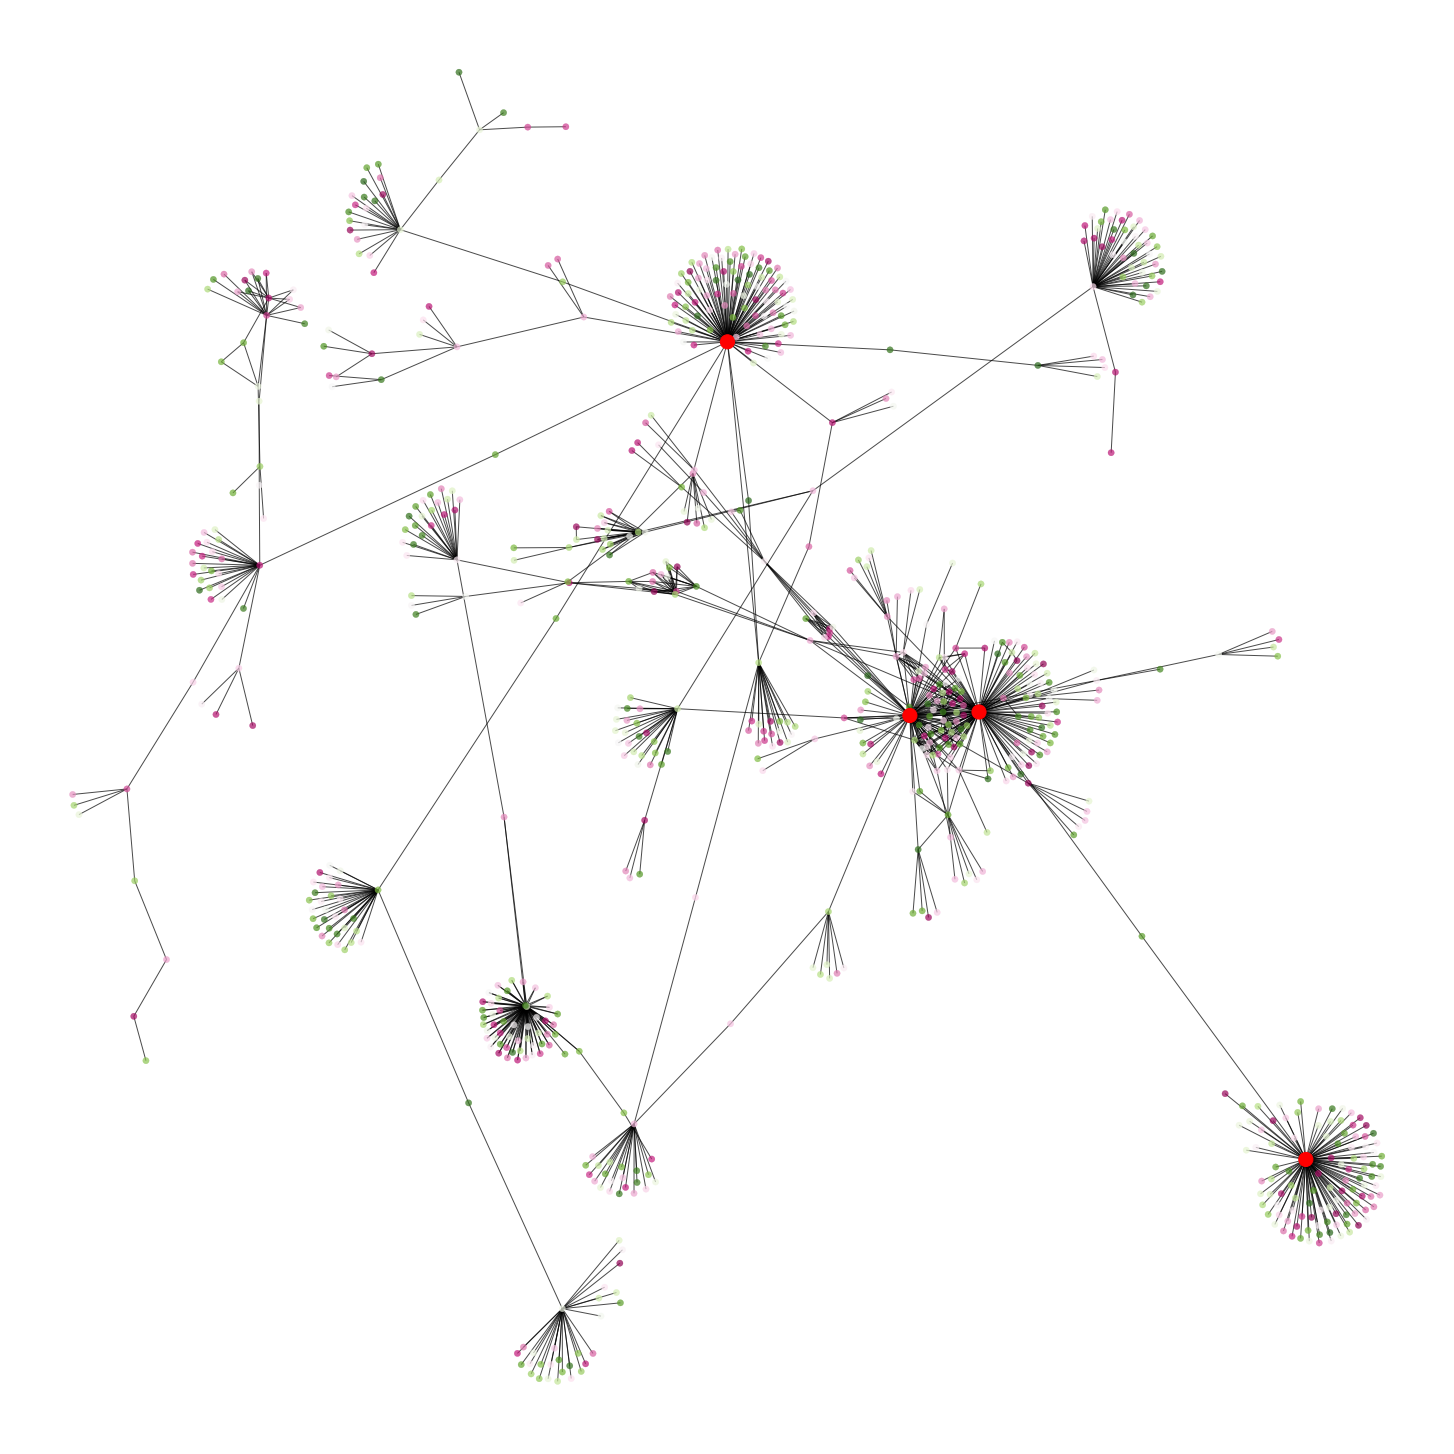

In [455]:
node_and_degree = largest_subgraph.degree()
colors_central_nodes = ['red', 'red', 'red', 'red']
central_nodes = ['dianaberrent', 'Survivor_Corps', 'RepJayapal', 'CeFaanKim']

pos = nx.spring_layout(largest_subgraph, k=0.05)

plt.figure(figsize = (20,20))
nx.draw(largest_subgraph, pos=pos, node_color=range(821), cmap=plt.cm.PiYG, edge_color="black", linewidths=0.3, node_size=40, alpha=0.7, with_labels=False)
nx.draw_networkx_nodes(largest_subgraph, pos=pos, nodelist=central_nodes, node_size=200, node_color=colors_central_nodes)
plt.savefig('social_networks.png')
plt.show()

#### Prevalence of Mentions

In [402]:
dG = G.to_directed()

In [403]:
dG.in_degree()

InDegreeView({'AngeliaDegrees': 1, 'latimes': 46, 'CABird6': 1, 'Variety': 114, 'billybennight': 1, 'stywixi': 1, 'tom_allard': 10, 'BonjourMrRacoon': 1, 'KELIKers': 1, 'LAupDates': 1, '_____mars_': 1, '_Rawilcox': 71, 'ardana333': 1, 'apathoni': 3, 'i_m_ham': 1, 'my2cnz': 1, 'PopCultured4': 2, 'vargaristic': 1, 'AlanBixter': 1, 'TamiSteans': 3, 'wetheridge': 4, 'JayECrawford': 4, 'AllMattNYT': 4, 'lilspicyboyy': 1, 'FeliciasArt': 1, 'Jonatha80958138': 1, 'MahesaDesaga': 1, 'roarkyd': 1, 'DGJourno': 1, 'CarrieBPickard': 3, 'KatyAReeve': 1, 'MarkT_2012': 1, 'azfamily': 1, 'RickyAppleseed': 1, 'J3nTyrell': 2, 'IainLJBrown': 14, 'SASsoftware': 14, 'russrusso': 1, '1AllisonLane': 1, 'rachelbauch': 1, 'deemaz85': 1, 'JRsagittarius': 1, 'nside_my_box': 1, 'adamtomlinson20': 4, 'pemackinnon': 1, 'FOXFOOTY': 1, 'GerardWhateley': 1, 'SENBreakfast': 1, 'kyuubiblue': 1, 'Variety_Cynthia': 1, 'Silverlakerr': 1, 'FunKelly': 1, 'kcrw': 1, 'AdamUPNOW': 1, 'metakate': 1, 'AmberRishi': 1, 'MuslimMirror

In [406]:
rank_indegree = sorted(dG.in_degree(), key=itemgetter(1), reverse=True)
rank_indegree[:20]

[('dianaberrent', 133),
 ('CharlesSzulc', 128),
 ('Variety', 114),
 ('CeFaanKim', 106),
 ('RepJayapal', 100),
 ('Survivor_Corps', 92),
 ('21WIRE', 83),
 ('smc429', 83),
 ('RepMattGaetz', 83),
 ('RatanSharda55', 78),
 ('13thFool', 72),
 ('_Rawilcox', 71),
 ('AlexandraHemmin', 67),
 ('oceanblue11oct', 67),
 ('RahulSinghkasan', 63),
 ('cew821', 59),
 ('Chatterj1Asking', 55),
 ('thedailybeast', 54),
 ('picardonhealth', 52),
 ('ChuSteJustine', 51)]

### 2.6 Most popular Tweets

The focus of this section is ***tweet_retweet_count***.

Because the tweets were processe, read the files again..

In [412]:
df_victim = pd.read_csv('./data/covid_victim.csv')
df_survivor = pd.read_csv('./data/covid_survivor.csv')

df_victim.drop_duplicates(keep='first',inplace=True)
df_survivor.drop_duplicates(keep='first',inplace=True)

df_victim = df_victim[df_victim['tweet_lang'] == 'en']
df_survivor = df_survivor[df_survivor['tweet_lang'] == 'en']

In [427]:
df_victim['tweet_retweet_count'] = df_victim['tweet_retweet_count'].astype(int)
df_survivor['tweet_retweet_count'] = df_survivor['tweet_retweet_count'].astype(int)

In [428]:
df_victim.sort_values('tweet_retweet_count', ascending=False).head(10)

,tweet_id,user_id,user_name,user_screen_name,user_location,user_description,user_url,user_followers_count,user_friends_count,user_listed_count,...,user_verified,tweet_created_at,tweet_source,tweet_text,tweet_lang,tweet_favorite_count,tweet_retweet_count,hashtags,mentions,urls
22759,1380108338260668417,19036563,"Obava, M.S.",Obava,NaN,she/her\r\nWhat if we kissed in the flames?,NaN,96,266,4,...,False,Thu Apr 08 10:40:43 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @kate_ptrv: I couldn’t just walk past this ...,en,0,14228,dataviz,kate_ptrv,NaN
40070,1379606002551697408,828889693,🦇✨ Роуч ✨🦇,not_your_victim,he/she 🌈🍖,"✨ im a disco ball. mostly void, partially star...",https://t.co/qhwpY94EQ1,314,513,12,...,False,Wed Apr 07 01:24:37 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @chris_notcapn: Holy shit.\r\n\r\nA new HIV...,en,0,5053,NaN,chris_notcapn,NaN
42967,1379496992523620361,472230348,3 degrees in 4 months.,bill_Covid,Burma Camp,"tempus fugit⏰, momento mori☠",NaN,192,176,0,...,False,Tue Apr 06 18:11:27 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @mnm_mensah: Sonnie Badu's Fake Degrees: A ...,en,0,1620,NaN,mnm_mensah,NaN
10314,1380583898267197445,828889693,🦇✨ Роуч ✨🦇,not_your_victim,he/she 🌈🍖,"✨ im a disco ball. mostly void, partially star...",https://t.co/qhwpY94EQ1,314,513,12,...,False,Fri Apr 09 18:10:26 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @danbloom1: Government is to more or less e...,en,0,557,NaN,danbloom1,NaN
48987,1379284105993551873,362680618,Radar de Manaus,RadardeManaus,brasil,“Ao vencedor as batatas”,NaN,331,628,0,...,False,Tue Apr 06 04:05:31 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",RT @camanpour: “We have to discuss the surviva...,en,0,551,NaN,camanpour; LulaOficial,NaN
45954,1379403154945683457,1163876526,Margo Kowalczyk,MargoKowalczyk,"Toronto, Canada",NaN,NaN,2006,2170,222,...,False,Tue Apr 06 11:58:34 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @Paulatics: FWIW. We are not living in a co...,en,0,544,NaN,Paulatics,NaN
3556,1381216649047515136,1380777554743717894,heyy,soberIoving,‼️,ੈ♡˳ 19 !! she/her ʚ♡⃛ɞ history / jjk / conan l...,https://t.co/2TpLQSxyIL,25,26,0,...,False,Sun Apr 11 12:04:45 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...","RT @asu_sdasa: “You have a rape kit, you have ...",en,0,321,NaN,asu_sdasa,NaN
55411,1379123603128655880,1350182740180815873,🤪🇺🇸🇺🇸🦅🙈Tinfoilhat1984🙈🦅🇺🇸🇺🇸🤔,Tinfoilhat19842,Merica,"IDK..Do you? What is ""knowing?"" What is ""real?...",https://t.co/zCp28JQl8w,369,2298,2,...,False,Mon Apr 05 17:27:44 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @FBI: Are your children spending more time ...,en,0,288,COVID19; FBI,FBI,NaN
13392,1380351697646575620,932713839409364992,Suzanne Coleman,SuzanneC0leman,"South East, England","#Tech enthusiast, interested in #AI applicatio...",NaN,748,530,29,...,False,Fri Apr 09 02:47:45 +0000 2021,"<a href=""https://ctriq.org"" rel=""nofollow"">My ...",RT @IainLJBrown: Credit card #scams are soarin...,en,0,240,scams,IainLJBrown; SASsoftware,NaN
18740,1380186090703876097,938510085420146689,Marco Park,MarcoPark21,"London, England",#IT Consultant based in London,NaN,271,110,18,...,False,Thu Apr 08 15:49:41 +0000 2021,"<a href=""https://spences10.github.io"" rel=""nof...",RT @IainLJBrown: Credit card #scams are soarin...,en,0,240,scams,IainLJBrown; SASsoftware,NaN


In [437]:
top_victim_tweets = df_victim.sort_values('tweet_retweet_count', ascending=False).head(10)
top_victim_tweets.reset_index(inplace=True)
top_victim_tweets

,index,tweet_id,user_id,user_name,user_screen_name,user_location,user_description,user_url,user_followers_count,user_friends_count,...,user_verified,tweet_created_at,tweet_source,tweet_text,tweet_lang,tweet_favorite_count,tweet_retweet_count,hashtags,mentions,urls
0,22759,1380108338260668417,19036563,"Obava, M.S.",Obava,NaN,she/her\r\nWhat if we kissed in the flames?,NaN,96,266,...,False,Thu Apr 08 10:40:43 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @kate_ptrv: I couldn’t just walk past this ...,en,0,14228,dataviz,kate_ptrv,NaN
1,40070,1379606002551697408,828889693,🦇✨ Роуч ✨🦇,not_your_victim,he/she 🌈🍖,"✨ im a disco ball. mostly void, partially star...",https://t.co/qhwpY94EQ1,314,513,...,False,Wed Apr 07 01:24:37 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @chris_notcapn: Holy shit.\r\n\r\nA new HIV...,en,0,5053,NaN,chris_notcapn,NaN
2,42967,1379496992523620361,472230348,3 degrees in 4 months.,bill_Covid,Burma Camp,"tempus fugit⏰, momento mori☠",NaN,192,176,...,False,Tue Apr 06 18:11:27 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @mnm_mensah: Sonnie Badu's Fake Degrees: A ...,en,0,1620,NaN,mnm_mensah,NaN
3,10314,1380583898267197445,828889693,🦇✨ Роуч ✨🦇,not_your_victim,he/she 🌈🍖,"✨ im a disco ball. mostly void, partially star...",https://t.co/qhwpY94EQ1,314,513,...,False,Fri Apr 09 18:10:26 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @danbloom1: Government is to more or less e...,en,0,557,NaN,danbloom1,NaN
4,48987,1379284105993551873,362680618,Radar de Manaus,RadardeManaus,brasil,“Ao vencedor as batatas”,NaN,331,628,...,False,Tue Apr 06 04:05:31 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",RT @camanpour: “We have to discuss the surviva...,en,0,551,NaN,camanpour; LulaOficial,NaN
5,45954,1379403154945683457,1163876526,Margo Kowalczyk,MargoKowalczyk,"Toronto, Canada",NaN,NaN,2006,2170,...,False,Tue Apr 06 11:58:34 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @Paulatics: FWIW. We are not living in a co...,en,0,544,NaN,Paulatics,NaN
6,3556,1381216649047515136,1380777554743717894,heyy,soberIoving,‼️,ੈ♡˳ 19 !! she/her ʚ♡⃛ɞ history / jjk / conan l...,https://t.co/2TpLQSxyIL,25,26,...,False,Sun Apr 11 12:04:45 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...","RT @asu_sdasa: “You have a rape kit, you have ...",en,0,321,NaN,asu_sdasa,NaN
7,55411,1379123603128655880,1350182740180815873,🤪🇺🇸🇺🇸🦅🙈Tinfoilhat1984🙈🦅🇺🇸🇺🇸🤔,Tinfoilhat19842,Merica,"IDK..Do you? What is ""knowing?"" What is ""real?...",https://t.co/zCp28JQl8w,369,2298,...,False,Mon Apr 05 17:27:44 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @FBI: Are your children spending more time ...,en,0,288,COVID19; FBI,FBI,NaN
8,13392,1380351697646575620,932713839409364992,Suzanne Coleman,SuzanneC0leman,"South East, England","#Tech enthusiast, interested in #AI applicatio...",NaN,748,530,...,False,Fri Apr 09 02:47:45 +0000 2021,"<a href=""https://ctriq.org"" rel=""nofollow"">My ...",RT @IainLJBrown: Credit card #scams are soarin...,en,0,240,scams,IainLJBrown; SASsoftware,NaN
9,18740,1380186090703876097,938510085420146689,Marco Park,MarcoPark21,"London, England",#IT Consultant based in London,NaN,271,110,...,False,Thu Apr 08 15:49:41 +0000 2021,"<a href=""https://spences10.github.io"" rel=""nof...",RT @IainLJBrown: Credit card #scams are soarin...,en,0,240,scams,IainLJBrown; SASsoftware,NaN


In [450]:
for i, t in top_victim_tweets.iterrows():
    if i == 0 or i == 1 or i == 2:
        print('The Tweet with ' + str(t['tweet_retweet_count']) + ' retweets said:')
        print(t['tweet_text'])
        print('\n')

The Tweet with 14228 retweets said:
RT @kate_ptrv: I couldn’t just walk past this Tweet, so here is some fun #dataviz

Scented candles: An unexpected victim of the COVID-19 pa…


The Tweet with 5053 retweets said:
RT @chris_notcapn: Holy shit.

A new HIV vaccine with a 97% antibody response rate in phase I human trials.  It is based on the Moderna's C…


The Tweet with 1620 retweets said:
RT @mnm_mensah: Sonnie Badu's Fake Degrees: A long thread

People are wondering why I'm on his case and why I'm calling him out. The case b…




In [431]:
df_survivor.sort_values('tweet_retweet_count', ascending=False).head(50)

,tweet_id,user_id,user_name,user_screen_name,user_location,user_description,user_url,user_followers_count,user_friends_count,user_listed_count,...,user_verified,tweet_created_at,tweet_source,tweet_text,tweet_lang,tweet_favorite_count,tweet_retweet_count,hashtags,mentions,urls
29975,1379098455310733312,1366118409612775432,Lauren,LaurenPChaney,NaN,Sheridan 📚 She/Her,https://t.co/xMpiZ2FT5z,4,17,0,...,False,Mon Apr 05 15:47:48 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",RT @ItsMa____: How to treat Covid at home ... ...,en,0,113873,NaN,ItsMa____,NaN
12010,1380115127689736193,2978249818,OLUWAsegun,ItsGhoke,Everywhere,"BLACK by Nature,PROUD by CHOICE...Certified NA...",NaN,1932,1280,4,...,False,Thu Apr 08 11:07:42 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @ItsMa____: How to treat Covid at home ... ...,en,0,113873,NaN,ItsMa____,NaN
34595,1379309212220731393,1109682093607530496,pi diddiy,pi_diddiy,"East Memphis, Memphis",Wassam🐒💙 #bi,https://t.co/qefiibzGGl,719,1668,0,...,False,Tue Apr 06 05:45:17 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",RT @ItsMa____: How to treat Covid at home ... ...,en,0,113873,NaN,ItsMa____,NaN
25247,1379309212220731393,1109682093607530496,pi diddiy,pi_diddiy,"East Memphis, Memphis",Wassam🐒💙 #bi,https://t.co/qefiibzGGl,719,1668,0,...,False,Tue Apr 06 05:45:17 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",RT @ItsMa____: How to treat Covid at home ... ...,en,0,113873,NaN,ItsMa____,NaN
34849,1379098455310733312,1366118409612775432,Lauren,LaurenPChaney,NaN,Sheridan 📚 She/Her,https://t.co/xMpiZ2FT5z,4,17,0,...,False,Mon Apr 05 15:47:48 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",RT @ItsMa____: How to treat Covid at home ... ...,en,0,113873,NaN,ItsMa____,NaN
34858,1379095369552912387,2865561855,CHENYA 🇰🇪🇨🇳,digitalmkenya,"Nairobi, Kenya",Men must become.,https://t.co/l63sevPP3a,2931,38,22,...,False,Mon Apr 05 15:35:33 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @ItsMa____: How to treat Covid at home ... ...,en,0,113873,NaN,ItsMa____,NaN
33835,1380220060849958912,2415041822,✡︎ em ☭,dikekyke,they/them,i would like an eternal nap // liberation for ...,https://t.co/g5IvMloslp,458,376,5,...,False,Thu Apr 08 18:04:40 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",RT @ItsMa____: How to treat Covid at home ... ...,en,0,113873,NaN,ItsMa____,NaN
34014,1380082071234699264,1348360472400166912,‎𝙑𝙄𝙍𝙐𝙎𝙀𝙎𝙌𝙐𝙀 🔰,Virusesque0,"Old Toilet, Manchester",Love United Hate Ole. Hope this helps.,NaN,368,578,2,...,False,Thu Apr 08 08:56:21 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",RT @ItsMa____: How to treat Covid at home ... ...,en,0,113873,NaN,ItsMa____,NaN
13560,1380082071234699264,1348360472400166912,‎𝙑𝙄𝙍𝙐𝙎𝙀𝙎𝙌𝙐𝙀 🔰,Virusesque0,"Old Toilet, Manchester",Love United Hate Ole. Hope this helps.,NaN,368,578,2,...,False,Thu Apr 08 08:56:21 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",RT @ItsMa____: How to treat Covid at home ... ...,en,0,113873,NaN,ItsMa____,NaN
33965,1380115127689736193,2978249818,OLUWAsegun,ItsGhoke,Everywhere,"BLACK by Nature,PROUD by CHOICE...Certified NA...",NaN,1932,1280,4,...,False,Thu Apr 08 11:07:42 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @ItsMa____: How to treat Covid at home ... ...,en,0,113873,NaN,ItsMa____,NaN


In [451]:
top_survivor_tweets = df_survivor.sort_values('tweet_retweet_count', ascending=False).head(50)
top_survivor_tweets.reset_index(inplace=True)
top_survivor_tweets

,index,tweet_id,user_id,user_name,user_screen_name,user_location,user_description,user_url,user_followers_count,user_friends_count,...,user_verified,tweet_created_at,tweet_source,tweet_text,tweet_lang,tweet_favorite_count,tweet_retweet_count,hashtags,mentions,urls
0,29975,1379098455310733312,1366118409612775432,Lauren,LaurenPChaney,NaN,Sheridan 📚 She/Her,https://t.co/xMpiZ2FT5z,4,17,...,False,Mon Apr 05 15:47:48 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",RT @ItsMa____: How to treat Covid at home ... ...,en,0,113873,NaN,ItsMa____,NaN
1,12010,1380115127689736193,2978249818,OLUWAsegun,ItsGhoke,Everywhere,"BLACK by Nature,PROUD by CHOICE...Certified NA...",NaN,1932,1280,...,False,Thu Apr 08 11:07:42 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @ItsMa____: How to treat Covid at home ... ...,en,0,113873,NaN,ItsMa____,NaN
2,34595,1379309212220731393,1109682093607530496,pi diddiy,pi_diddiy,"East Memphis, Memphis",Wassam🐒💙 #bi,https://t.co/qefiibzGGl,719,1668,...,False,Tue Apr 06 05:45:17 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",RT @ItsMa____: How to treat Covid at home ... ...,en,0,113873,NaN,ItsMa____,NaN
3,25247,1379309212220731393,1109682093607530496,pi diddiy,pi_diddiy,"East Memphis, Memphis",Wassam🐒💙 #bi,https://t.co/qefiibzGGl,719,1668,...,False,Tue Apr 06 05:45:17 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",RT @ItsMa____: How to treat Covid at home ... ...,en,0,113873,NaN,ItsMa____,NaN
4,34849,1379098455310733312,1366118409612775432,Lauren,LaurenPChaney,NaN,Sheridan 📚 She/Her,https://t.co/xMpiZ2FT5z,4,17,...,False,Mon Apr 05 15:47:48 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",RT @ItsMa____: How to treat Covid at home ... ...,en,0,113873,NaN,ItsMa____,NaN
5,34858,1379095369552912387,2865561855,CHENYA 🇰🇪🇨🇳,digitalmkenya,"Nairobi, Kenya",Men must become.,https://t.co/l63sevPP3a,2931,38,...,False,Mon Apr 05 15:35:33 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @ItsMa____: How to treat Covid at home ... ...,en,0,113873,NaN,ItsMa____,NaN
6,33835,1380220060849958912,2415041822,✡︎ em ☭,dikekyke,they/them,i would like an eternal nap // liberation for ...,https://t.co/g5IvMloslp,458,376,...,False,Thu Apr 08 18:04:40 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",RT @ItsMa____: How to treat Covid at home ... ...,en,0,113873,NaN,ItsMa____,NaN
7,34014,1380082071234699264,1348360472400166912,‎𝙑𝙄𝙍𝙐𝙎𝙀𝙎𝙌𝙐𝙀 🔰,Virusesque0,"Old Toilet, Manchester",Love United Hate Ole. Hope this helps.,NaN,368,578,...,False,Thu Apr 08 08:56:21 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",RT @ItsMa____: How to treat Covid at home ... ...,en,0,113873,NaN,ItsMa____,NaN
8,13560,1380082071234699264,1348360472400166912,‎𝙑𝙄𝙍𝙐𝙎𝙀𝙎𝙌𝙐𝙀 🔰,Virusesque0,"Old Toilet, Manchester",Love United Hate Ole. Hope this helps.,NaN,368,578,...,False,Thu Apr 08 08:56:21 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",RT @ItsMa____: How to treat Covid at home ... ...,en,0,113873,NaN,ItsMa____,NaN
9,33965,1380115127689736193,2978249818,OLUWAsegun,ItsGhoke,Everywhere,"BLACK by Nature,PROUD by CHOICE...Certified NA...",NaN,1932,1280,...,False,Thu Apr 08 11:07:42 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @ItsMa____: How to treat Covid at home ... ...,en,0,113873,NaN,ItsMa____,NaN


In [452]:
for i, t in top_survivor_tweets.iterrows():
    if i == 0 or i == 12 or i == 26 or i == 28:
        print('The Tweet with ' + str(t['tweet_retweet_count']) + ' retweets said:')
        print(t['tweet_text'])
        print('\n')

The Tweet with 113873 retweets said:
RT @ItsMa____: How to treat Covid at home ... this was shared on a Covid survivor group...

HOW TO FIGHT COVID AT HOME
No one ever talks ab…


The Tweet with 17427 retweets said:
RT @DovForman: My 97-Year-old Great Grandma, Lily Ebert BEM - Auschwitz Survivor, has just recovered from Covid- 19.
   
Today she went on…


The Tweet with 11706 retweets said:
RT @kaylangeIa: i just heard on the news that 40,000+ children lost a parent to covid in the past year and that shit would never not infuri…


The Tweet with 5819 retweets said:
RT @ReutersScience: A third of COVID-19 survivors in a study of more than 230,000 mostly American patients were diagnosed with a brain or p…


